In [1]:
from google.colab import files

# Upload the Kaggle API token (kaggle.json)
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d anshtanwar/jellyfish-types

 67% 17.0M/25.5M [00:00<00:00, 85.4MB/s]
100% 25.5M/25.5M [00:00<00:00, 104MB/s] 


In [4]:
# Create a folder for the dataset
!mkdir -p /content/jellyfish_dataset

# Unzip the dataset into the folder
!unzip -q jellyfish-types.zip -d /content/jellyfish_dataset

# List the contents of the dataset folder
dataset_path = '/content/jellyfish_dataset'

In [5]:
import shutil

# Specify the path to the folder you want to delete
folder_to_delete = '/content/jellyfish_dataset/Train_Test_Valid'

# Delete the folder and its contents
shutil.rmtree(folder_to_delete)


In [7]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import Model
from keras.applications.inception_v3 import InceptionV3

In [8]:
# Load the pre-trained InceptionV3 model with pre-trained weights on ImageNet
pre_trained_model = InceptionV3(input_shape=(150, 150, 3), include_top=False, weights='imagenet')

# Freeze the pre-trained layers
for layer in pre_trained_model.layers:
    layer.trainable = False

last_layer =  pre_trained_model.get_layer('mixed7')
last_output = pre_trained_model.output

87910968/87910968 [==============================] - 1s 0us/step


In [9]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# YOUR IMAGE SIZE SHOULD BE 150x150
train_generator= datagen.flow_from_directory(
    dataset_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator= datagen.flow_from_directory(
    dataset_path,
    target_size=(150,150),
    class_mode='categorical',
    subset='validation'
)

Found 720 images belonging to 6 classes.
Found 180 images belonging to 6 classes.


In [18]:
x = layers.Flatten() (last_output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(6, activation='softmax')(x)

model = Model(pre_trained_model.input, x)

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_normalization[0]

In [19]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    verbose=1,
)

Epoch 1/5
23/23 [==============================] - 105s 2s/step - loss: 13.1842 - acc: 0.4167 - val_loss: 2.3287 - val_acc: 0.6667
Epoch 2/5
23/23 [==============================] - 43s 2s/step - loss: 1.0020 - acc: 0.7833 - val_loss: 0.3959 - val_acc: 0.8556
Epoch 3/5
23/23 [==============================] - 38s 2s/step - loss: 0.2436 - acc: 0.9042 - val_loss: 0.2303 - val_acc: 0.9167
Epoch 4/5
23/23 [==============================] - 42s 2s/step - loss: 0.1061 - acc: 0.9694 - val_loss: 0.1992 - val_acc: 0.9333
Epoch 5/5
23/23 [==============================] - 41s 2s/step - loss: 0.0527 - acc: 0.9903 - val_loss: 0.1549 - val_acc: 0.9500


In [29]:
from collections import Counter
# Get the class indices
class_indices = train_generator.class_indices

# Create a counter to count the number of images in each class
class_counter = Counter(train_generator.classes)

# Display the number of images in each class
for class_name, class_index in class_indices.items():
    num_images = class_counter[class_index]
    print(f"Class '{class_name}' has {num_images} images in the train set.")

Class 'Moon_jellyfish' has 120 images in the train set.
Class 'barrel_jellyfish' has 120 images in the train set.
Class 'blue_jellyfish' has 120 images in the train set.
Class 'compass_jellyfish' has 120 images in the train set.
Class 'lions_mane_jellyfish' has 120 images in the train set.
Class 'mauve_stinger_jellyfish' has 120 images in the train set.


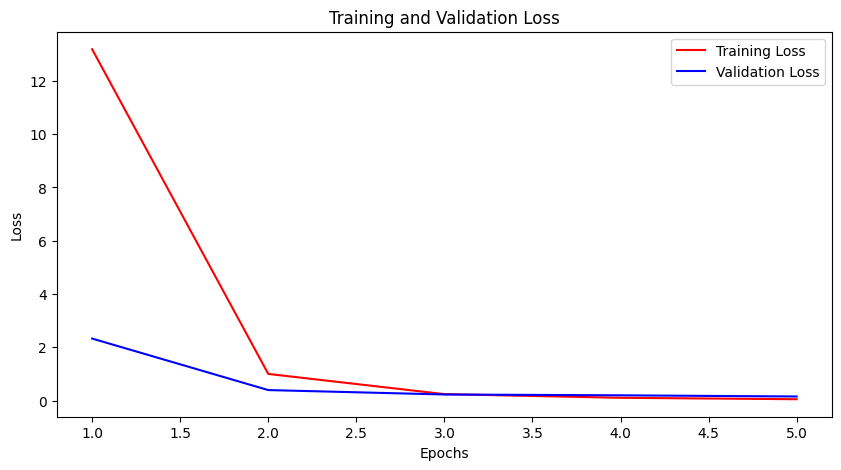

In [30]:
import matplotlib.pyplot as plt

# Access the training and validation loss from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']

# Set up the plot
plt.figure(figsize=(10, 5))

# Plot training loss
plt.plot(range(1, len(loss) + 1), loss, 'r', label='Training Loss')

# Plot validation loss
plt.plot(range(1, len(val_loss) + 1), val_loss, 'b', label='Validation Loss')

# Set labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

# Add legend
plt.legend()

# Show the plot
plt.show()


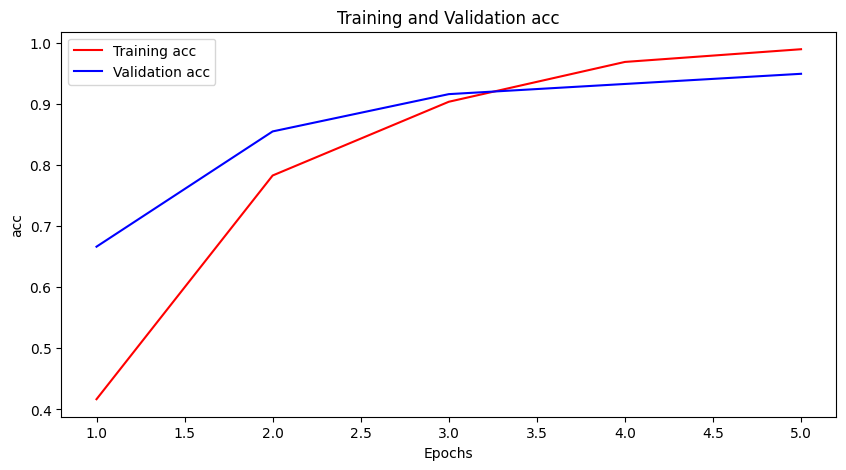

In [32]:
# Access the training and validation loss from the history object
acc = history.history['acc']
val_acc = history.history['val_acc']

# Set up the plot
plt.figure(figsize=(10, 5))

# Plot training acc
plt.plot(range(1, len(acc) + 1), acc, 'r', label='Training acc')

# Plot validation acc
plt.plot(range(1, len(val_acc) + 1), val_acc, 'b', label='Validation acc')

# Set labels and title
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.title('Training and Validation acc')

# Add legend
plt.legend()

# Show the plot
plt.show()


Saving 3-mauve-stinger-jellyfish-alexander-semenovscience-photo-library.jpg to 3-mauve-stinger-jellyfish-alexander-semenovscience-photo-library.jpg
Saving OIP (3).jpg to OIP (3).jpg
Saving R.jpg to R.jpg
Saving OIP (2).jpg to OIP (2).jpg
Saving OIP (1).jpg to OIP (1).jpg
Saving OIP.jpg to OIP.jpg


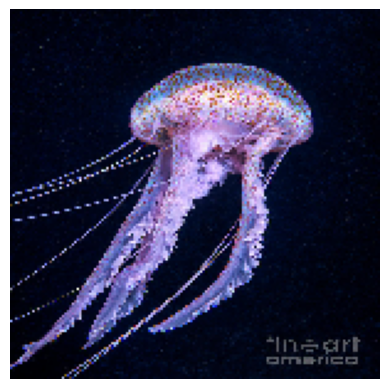

1/1 [==============================] - 0s 77ms/step
Predicted class: mauve_stinger_jellyfish
Class probabilities: [2.7595331e-11 3.4156632e-11 1.7683394e-07 5.1942054e-04 7.6269309e-08
 9.9948031e-01]



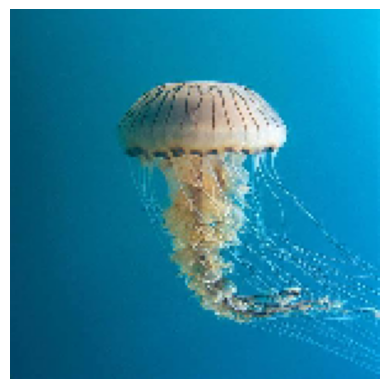

1/1 [==============================] - 0s 92ms/step
Predicted class: compass_jellyfish
Class probabilities: [1.0899029e-11 1.8965044e-05 4.7786637e-07 9.4061100e-01 7.7136512e-08
 5.9369460e-02]



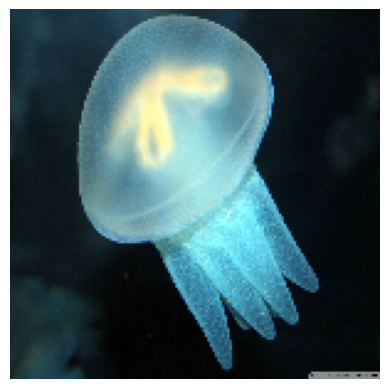

1/1 [==============================] - 0s 85ms/step
Predicted class: blue_jellyfish
Class probabilities: [2.9870173e-02 8.6367024e-08 9.7012836e-01 8.7147282e-07 1.2933710e-07
 3.4960138e-07]



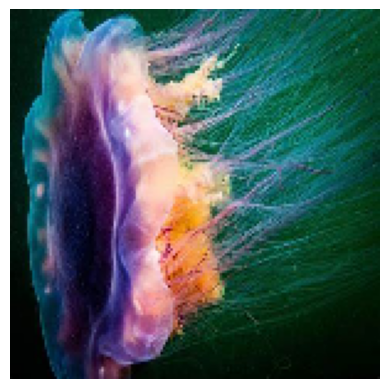

1/1 [==============================] - 0s 75ms/step
Predicted class: lions_mane_jellyfish
Class probabilities: [1.18028904e-04 1.27260296e-06 2.55618155e-01 5.11264807e-05
 7.44207442e-01 3.99338796e-06]



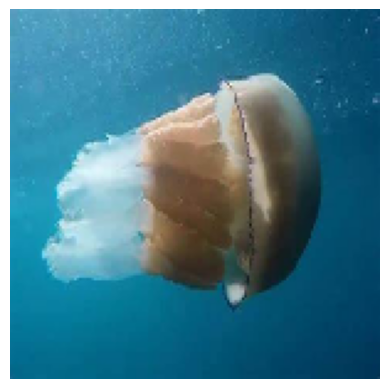

1/1 [==============================] - 0s 89ms/step
Predicted class: barrel_jellyfish
Class probabilities: [1.8875446e-11 9.9995220e-01 4.7121910e-05 1.4554828e-07 5.6382640e-07
 1.7987954e-09]



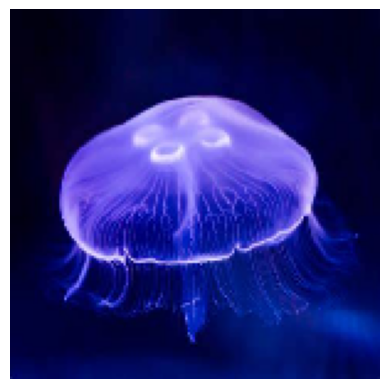

1/1 [==============================] - 0s 81ms/step
Predicted class: Moon_jellyfish
Class probabilities: [9.4186652e-01 2.1469162e-09 5.8123495e-02 5.8980218e-06 4.0351756e-06
 3.1847978e-08]



In [40]:
from keras.preprocessing import image
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Upload the image
uploaded = files.upload()

for fn in uploaded.keys():
    # predicting images
    path = '/content/' + fn
    img = load_img(path, target_size=(150, 150))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    x = img_to_array(img)
    x /= 255.0
    x = np.expand_dims(x, axis=0)

    # Predict the probabilities for each class
    probabilities = model.predict(x)

    # Get the predicted class index (class with the highest probability)
    predicted_class = np.argmax(probabilities)

    # Assuming you have class labels corresponding to the indices
    class_labels = list(train_generator.class_indices.keys())

    # Get the predicted class label
    predicted_class_label = class_labels[predicted_class]

    # Display the results
    print(f"Predicted class: {predicted_class_label}")
    print("Class probabilities:", probabilities[0])
    print()


In [45]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
import pickle
model.save('/content/drive/MyDrive/jellyfish_classification.h5')

with open('class_labels.txt', 'w') as file:
    for label in class_labels:
        file.write(label + '\n')

with open('history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

